<a href="https://colab.research.google.com/github/seuha516/DigitPrediction_server/blob/main/DigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
test_scaled=test_input.reshape(-1,28,28,1)/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

11493376/11490434 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

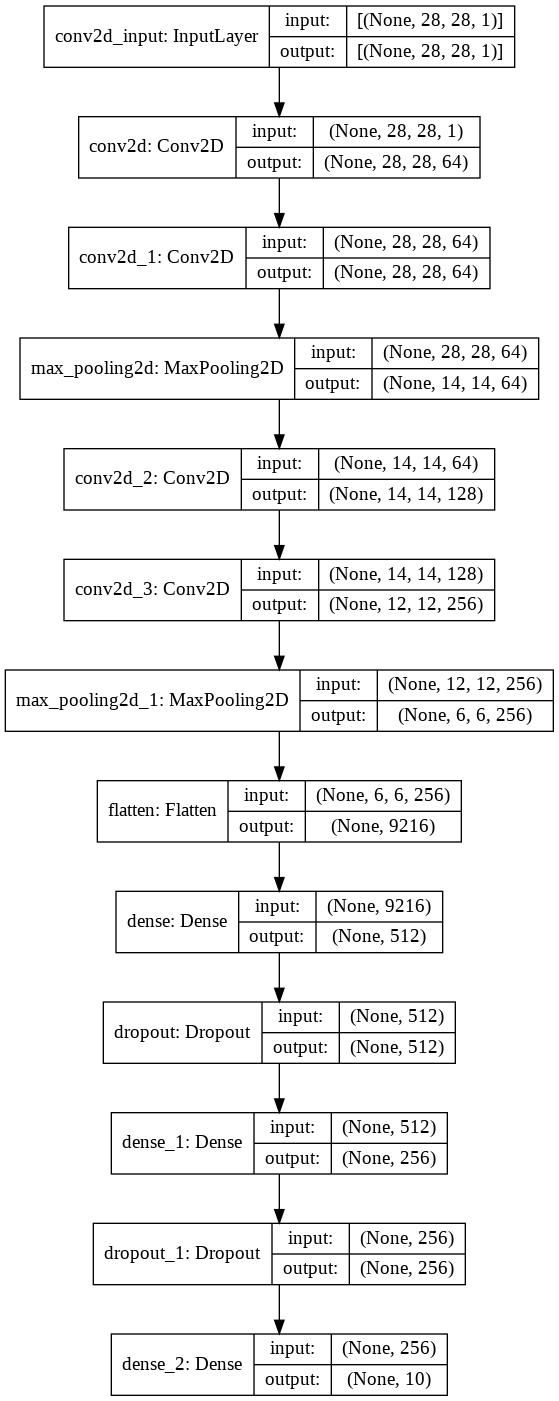

In [ ]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.Conv2D(256,kernel_size=3,activation='relu',padding='valid'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()
keras.utils.plot_model(model,show_shapes=True)

Epoch 1/100
1500/1500 [==============================] - 44s 8ms/step - loss: 0.3498 - accuracy: 0.8854 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 2/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0590 - accuracy: 0.9835 - val_loss: 0.0378 - val_accuracy: 0.9891
Epoch 3/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0427 - accuracy: 0.9885 - val_loss: 0.0417 - val_accuracy: 0.9891
Epoch 4/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0338 - accuracy: 0.9907 - val_loss: 0.0307 - val_accuracy: 0.9918
Epoch 5/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0276 - accuracy: 0.9923 - val_loss: 0.0416 - val_accuracy: 0.9893
Epoch 6/100
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0228 - accuracy: 0.9938 - val_loss: 0.0461 - val_accuracy: 0.9887


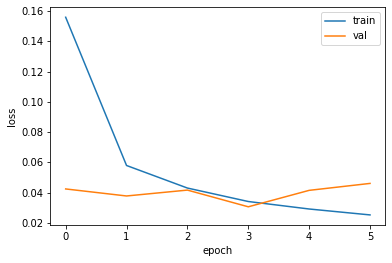

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history=model.fit(train_scaled,train_target,epochs=100,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.0307 - accuracy: 0.9918


[0.030678512528538704, 0.9918333292007446]

In [ ]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.0265 - accuracy: 0.9921


[0.026542330160737038, 0.9921000003814697]

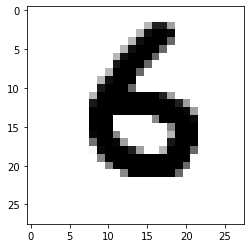

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
6


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np

img=Image.open("손그림 6.png").convert("L")
test_data=((np.array(img)/255)-1)*-1
plt.imshow(test_data.reshape(28,28),cmap='gray_r')
plt.show()

test_data=test_data.reshape(1,28,28,1)

model=keras.models.load_model('best-model.h5')
preds=model.predict(test_data[0:1])
print(np.round(preds,3))

print(np.argmax(preds))